In [1]:
library(tidyverse)
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [3]:
n_samples = 100000
study_sample_size_n = 20
assumed_sd = 0.3

underlying_avg_effect_size = runif(n = n_samples, min = 0.0, max = 0.25)
measured_effect = rnorm(n = n_samples, mean = underlying_avg_effect_size, sd = assumed_sd/sqrt(study_sample_size_n))

prior = data.frame(underlying_avg_effect_size,
                   measured_effect)

# prior

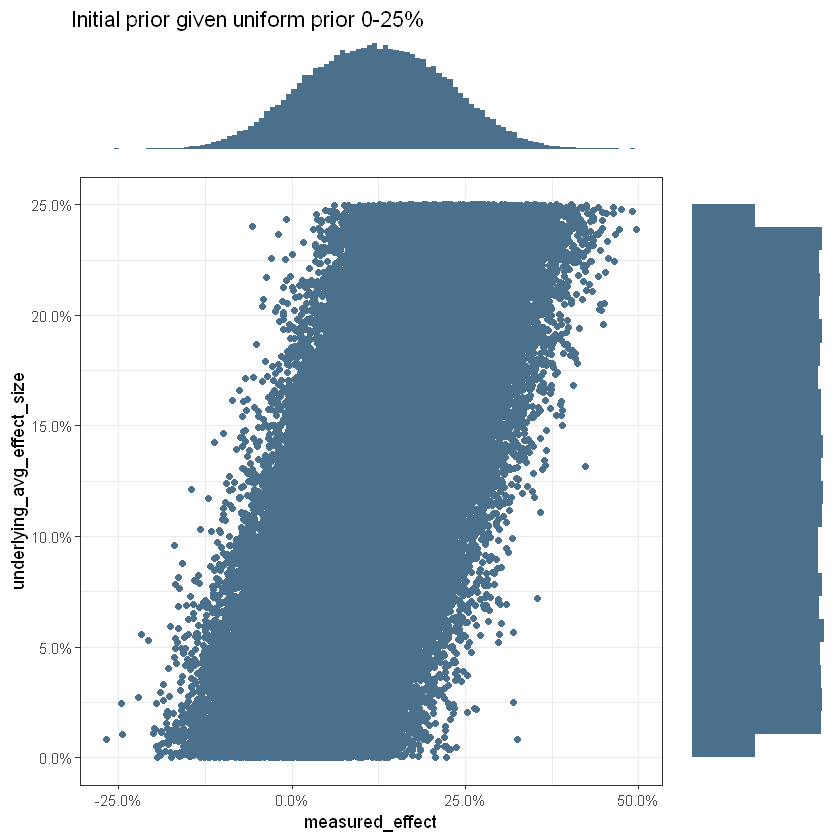

In [4]:
top_n_bins = 100
graph_color = 'skyblue4'

hist_top <- ggplot() + 
  geom_histogram(aes(measured_effect),
                 bins = top_n_bins,
                 fill = graph_color) +
  theme_bw() +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank()
  ) +
  ggtitle("Initial prior given uniform prior 0-25%")

empty <- ggplot() + 
  geom_point(aes(1,1), colour="white") +
  theme(axis.ticks = element_blank(), 
        panel.background = element_blank(), 
        axis.text.x = element_blank(), 
        axis.text.y = element_blank(),           
        axis.title.x = element_blank(), 
        axis.title.y = element_blank())

scatter <- ggplot() + 
  geom_point(aes(x = measured_effect, y = underlying_avg_effect_size),
             color = graph_color) +
  theme_bw() +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent)


hist_right <- ggplot() + 
  geom_histogram(aes(underlying_avg_effect_size),
                 bins = max(underlying_avg_effect_size * 100),
                 fill = graph_color) +
  coord_flip() +
  theme_bw() +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(color = "white"),
        axis.title.y = element_blank(),
        axis.title.x = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank()
  )

grid.arrange(hist_top, empty, 
             scatter, hist_right, 
             ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4))

### Condition on study result 0.05

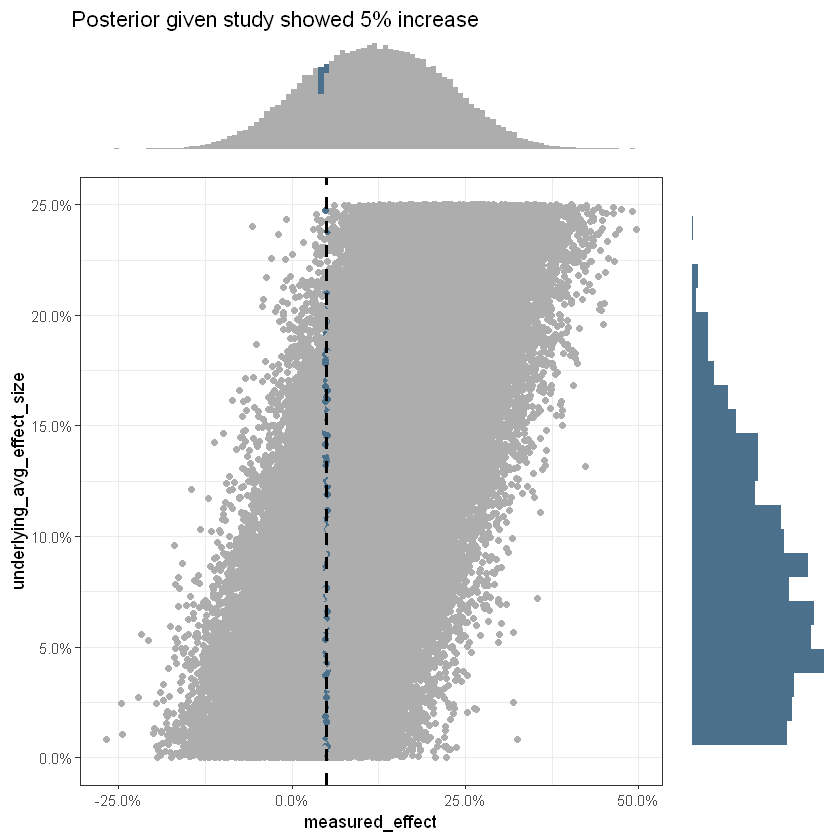

In [5]:
study_result = 0.05

conditioned_prior = prior %>% 
  mutate(percentiles = ntile(measured_effect, 100)) %>% 
  mutate(conditioning_color = if_else(percentiles == round(100 * sum(measured_effect < study_result) / 
                                                             length(measured_effect)), 
                                      "in", "out"))

hist_top <- conditioned_prior %>% 
  ggplot(aes(measured_effect, fill = conditioning_color)) + 
  geom_histogram(bins = top_n_bins) +
  theme_bw() +
  scale_fill_manual(values = c(graph_color, "grey68")) +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        legend.position = "none"
  ) +
  ggtitle("Posterior given study showed 5% increase")

scatter <- conditioned_prior %>% 
  ggplot(aes(x = measured_effect, y = underlying_avg_effect_size, color = conditioning_color)) + 
  geom_point() +
  theme_bw() +
  theme(legend.position = "none") +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent) +
  geom_vline(xintercept = study_result,
             linetype = "dashed",
             size = 1) +
  scale_color_manual(values = c(graph_color, "grey68"))


hist_right <- conditioned_prior %>% 
  filter(conditioning_color == "in") %>% 
  ggplot(aes(underlying_avg_effect_size)) + 
  geom_histogram(bins = max(underlying_avg_effect_size * 100),
                 fill = graph_color) +
  scale_x_continuous(limits = c(min(underlying_avg_effect_size), 
                                 max(underlying_avg_effect_size))) + # this is where "Removed 2 rows" warning comes from
  coord_flip() +
  theme_bw() +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(color = "white"),
        axis.title.y = element_blank(),
        axis.title.x = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        legend.position = "none"
  )

suppressWarnings(grid.arrange(hist_top, empty, 
                              scatter, hist_right, 
                              ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4)))

### Larger Sample Size

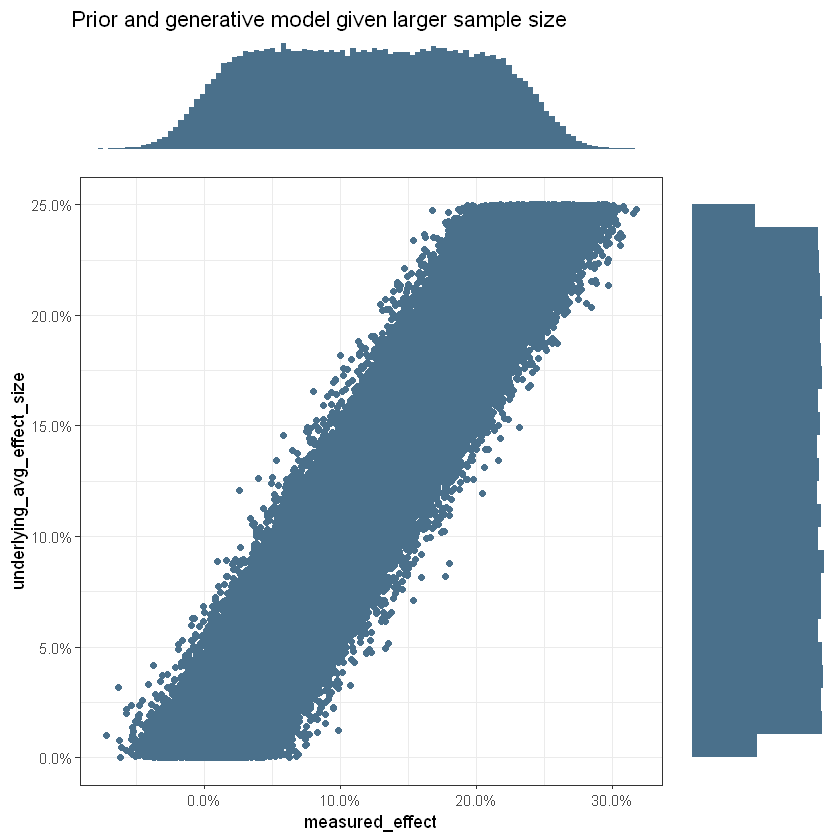

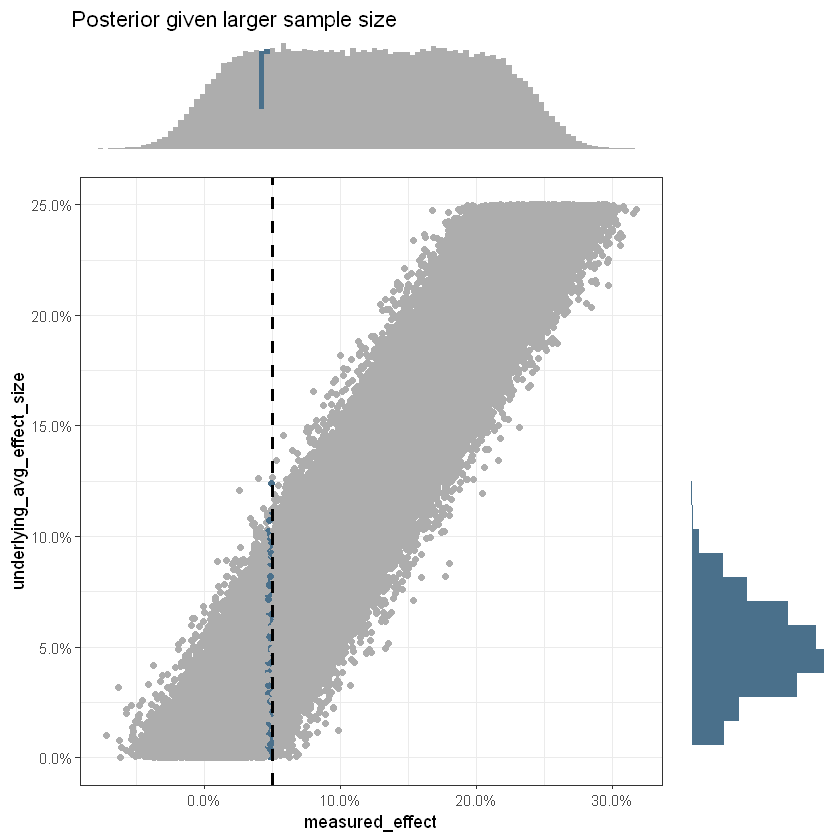

In [6]:
n_samples = 100000
study_sample_size_n = 200
assumed_sd = 0.3

underlying_avg_effect_size = runif(n = n_samples, min = 0.0, max = 0.25)
measured_effect = rnorm(n = n_samples, mean = underlying_avg_effect_size, sd = assumed_sd/sqrt(study_sample_size_n))

prior = data.frame(underlying_avg_effect_size,
                   measured_effect)

################################
hist_top <- ggplot() + 
  geom_histogram(aes(measured_effect),
                 bins = top_n_bins,
                 fill = graph_color) +
  theme_bw() +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank()
  ) +
  ggtitle("Prior and generative model given larger sample size")

empty <- ggplot() + 
  geom_point(aes(1,1), colour="white") +
  theme(axis.ticks = element_blank(), 
        panel.background = element_blank(), 
        axis.text.x = element_blank(), 
        axis.text.y = element_blank(),           
        axis.title.x = element_blank(), 
        axis.title.y = element_blank())

scatter <- ggplot() + 
  geom_point(aes(x = measured_effect, y = underlying_avg_effect_size),
             color = graph_color) +
  theme_bw() +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent)


hist_right <- ggplot() + 
  geom_histogram(aes(underlying_avg_effect_size),
                 bins = max(underlying_avg_effect_size * 100),
                 fill = graph_color) +
  coord_flip() +
  theme_bw() +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(color = "white"),
        axis.title.y = element_blank(),
        axis.title.x = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank()
  )

grid.arrange(hist_top, empty, 
             scatter, hist_right, 
             ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4))

#######################################

conditioned_prior = prior %>% 
  mutate(percentiles = ntile(measured_effect, 100)) %>% 
  mutate(conditioning_color = if_else(percentiles == round(100 * sum(measured_effect < study_result) / 
                                                             length(measured_effect)), 
                                      "in", "out"))

hist_top <- conditioned_prior %>% 
  ggplot(aes(measured_effect, fill = conditioning_color)) + 
  geom_histogram(bins = top_n_bins) +
  theme_bw() +
  scale_fill_manual(values = c(graph_color, "grey68")) +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        legend.position = "none"
  ) +
  ggtitle("Posterior given larger sample size")

scatter <- conditioned_prior %>% 
  ggplot(aes(x = measured_effect, y = underlying_avg_effect_size, color = conditioning_color)) + 
  geom_point() +
  theme_bw() +
  theme(legend.position = "none") +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent) +
  geom_vline(xintercept = study_result,
             linetype = "dashed",
             size = 1) +
  scale_color_manual(values = c(graph_color, "grey68"))


hist_right <- conditioned_prior %>% 
  filter(conditioning_color == "in") %>% 
  ggplot(aes(underlying_avg_effect_size)) + 
  geom_histogram(bins = max(underlying_avg_effect_size * 100),
                 fill = graph_color) +
  scale_x_continuous(limits = c(min(underlying_avg_effect_size), 
                                 max(underlying_avg_effect_size))) + # this is where "Removed 2 rows" warning comes from
  coord_flip() +
  theme_bw() +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(color = "white"),
        axis.title.y = element_blank(),
        axis.title.x = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        legend.position = "none"
  )

suppressWarnings(grid.arrange(hist_top, empty, 
                              scatter, hist_right, 
                              ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4)))

### Triangular Prior

In [8]:
install.packages("EnvStats")

also installing the dependency 'nortest'



package 'nortest' successfully unpacked and MD5 sums checked
package 'EnvStats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\db1\AppData\Local\Temp\RtmpojKD2s\downloaded_packages


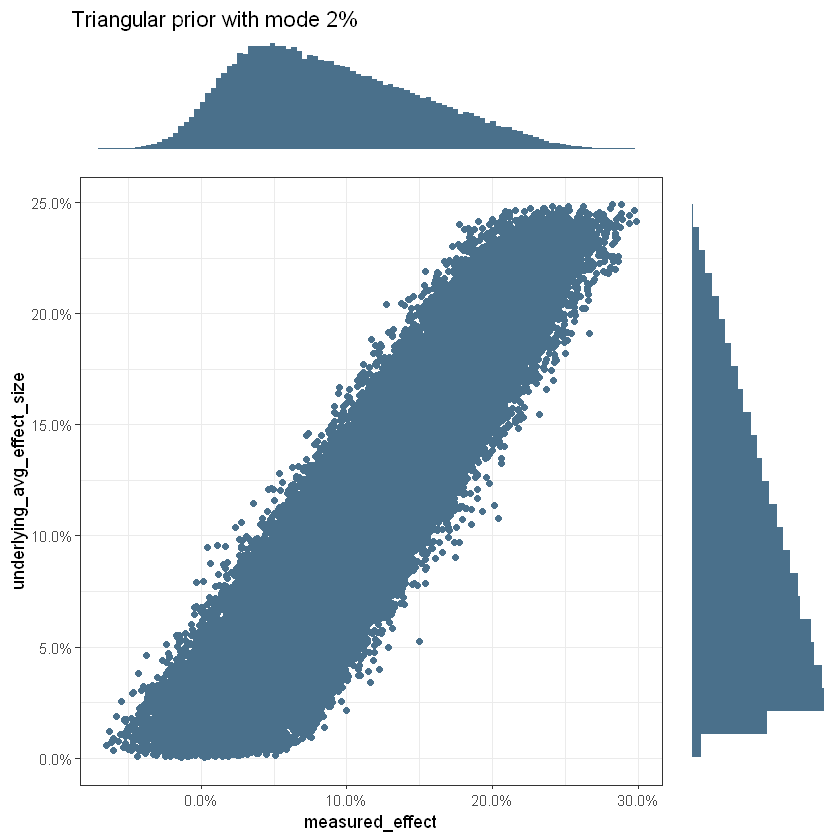

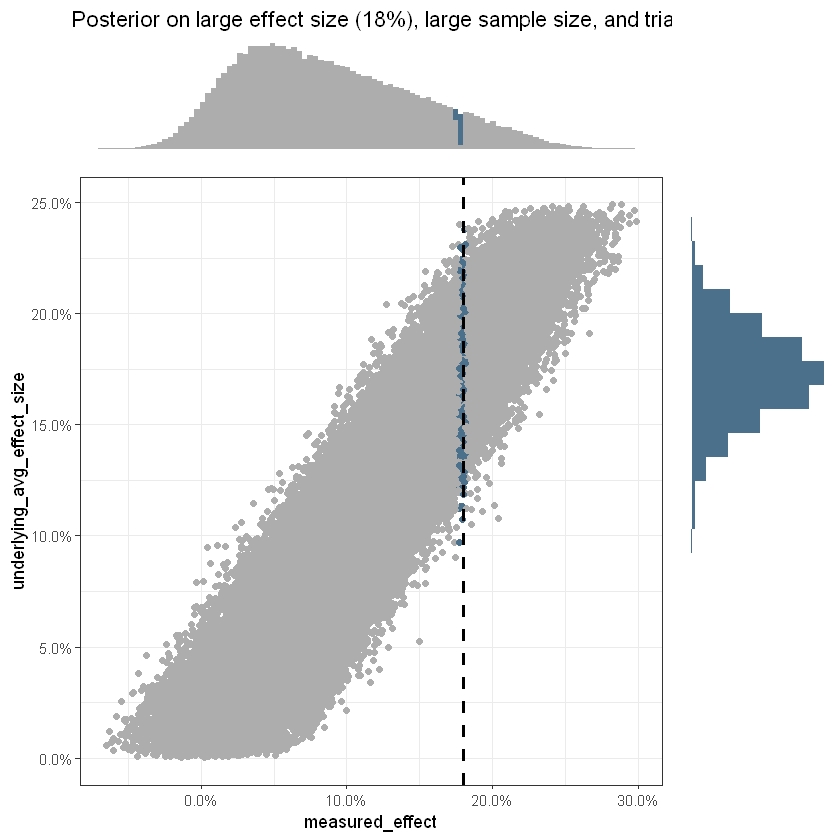

In [9]:
n_samples = 100000
study_sample_size_n = 200
assumed_sd = 0.3

### Use a triangular prior with mode 2%
underlying_avg_effect_size = EnvStats::rtri(n = n_samples, min = 0.0, max = 0.25, mode = 0.02)
measured_effect = rnorm(n = n_samples, mean = underlying_avg_effect_size, sd = assumed_sd/sqrt(study_sample_size_n))

prior = data.frame(underlying_avg_effect_size,
                   measured_effect)

################################
hist_top <- ggplot() + 
  geom_histogram(aes(measured_effect),
                 bins = top_n_bins,
                 fill = graph_color) +
  theme_bw() +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank()
  ) +
  ggtitle("Triangular prior with mode 2%")

empty <- ggplot() + 
  geom_point(aes(1,1), colour="white") +
  theme(axis.ticks = element_blank(), 
        panel.background = element_blank(), 
        axis.text.x = element_blank(), 
        axis.text.y = element_blank(),           
        axis.title.x = element_blank(), 
        axis.title.y = element_blank())

scatter <- ggplot() + 
  geom_point(aes(x = measured_effect, y = underlying_avg_effect_size),
             color = graph_color) +
  theme_bw() +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent)


hist_right <- ggplot() + 
  geom_histogram(aes(underlying_avg_effect_size),
                 bins = max(underlying_avg_effect_size * 100),
                 fill = graph_color) +
  coord_flip() +
  theme_bw() +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(color = "white"),
        axis.title.y = element_blank(),
        axis.title.x = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank()
  )

grid.arrange(hist_top, empty, 
             scatter, hist_right, 
             ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4))

#######################################

study_result = 0.18

conditioned_prior = prior %>% 
  mutate(percentiles = ntile(measured_effect, 100)) %>% 
  mutate(conditioning_color = if_else(percentiles == round(100 * sum(measured_effect < study_result) / 
                                                             length(measured_effect)), 
                                      "in", "out"))

hist_top <- conditioned_prior %>% 
  ggplot(aes(measured_effect, fill = conditioning_color)) + 
  geom_histogram(bins = top_n_bins) +
  theme_bw() +
  scale_fill_manual(values = c(graph_color, "grey68")) +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        legend.position = "none"
  ) +
  ggtitle("Posterior on large effect size (18%), large sample size, and trianular prior")

scatter <- conditioned_prior %>% 
  ggplot(aes(x = measured_effect, y = underlying_avg_effect_size, color = conditioning_color)) + 
  geom_point() +
  theme_bw() +
  theme(legend.position = "none") +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent) +
  geom_vline(xintercept = study_result,
             linetype = "dashed",
             size = 1) +
  scale_color_manual(values = c(graph_color, "grey68"))


hist_right <- conditioned_prior %>% 
  filter(conditioning_color == "in") %>% 
  ggplot(aes(underlying_avg_effect_size)) + 
  geom_histogram(bins = max(underlying_avg_effect_size * 100),
                 fill = graph_color) +
  scale_x_continuous(limits = c(min(underlying_avg_effect_size), 
                                 max(underlying_avg_effect_size))) +
  coord_flip() +
  theme_bw() +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(color = "white"),
        axis.title.y = element_blank(),
        axis.title.x = element_text(color = "white"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        legend.position = "none"
  )

suppressWarnings(grid.arrange(hist_top, empty, 
                              scatter, hist_right, 
                              ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4)))